# Sentiment Analysis of IMDB Reviews

This notebook provides an analysis of IMDB movie reviews to determine the sentiment (positive or negative) of each review. The steps include data cleaning, preprocessing, and exploratory data analysis.

### Outline
1. Import Libraries
2. Load Dataset
3. Data Cleaning and Preprocessing
4. Exploratory Data Analysis (EDA)
5. Conclusion

In [31]:
# Import necessary libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize NLTK tools
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shawal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shawal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shawal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Load the dataset
file_path = "IMDB Dataset.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head

<bound method NDFrame.head of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

# Data Cleaning and Preprocessing

In [4]:
# Drop NaN rows
data.dropna(subset = ['review'], inplace = True)

## Remove HTML Tags

In [5]:
# Function to remove HTML Tags
def remove_html_tags(text):
    clean_text = re.sub(r'<[^>]+>', '', text)
    return clean_text

# Apply the function to the 'review' column
data['review'] = data['review'].apply(remove_html_tags)

## Remove Punctuation

In [6]:
# Function to remove punctuation
def remove_punctuation(text):
    clean_text = re.sub(r'[^\w\s]', '', text)
    return clean_text

# Apply the function to the 'review' column
data['review'] = data['review'].apply(remove_punctuation)

## Convert Text to Lowercase

In [7]:
data['review'] = data['review'].str.lower()

## Tokenize the Text

In [8]:
data['review'] = data['review'].apply(word_tokenize)

## Remove Stop Words

In [9]:
data['review'] = data['review'].apply(lambda x: [word for word in x if word not in stop_words])

## Stemming

In [10]:
data['review'] = data['review'].apply(lambda x: [stemmer.stem(word) for word in x])

In [ ]:
data['review'].head()

# Exploratory Data Analysis

## Visualize Sentiment Distribution

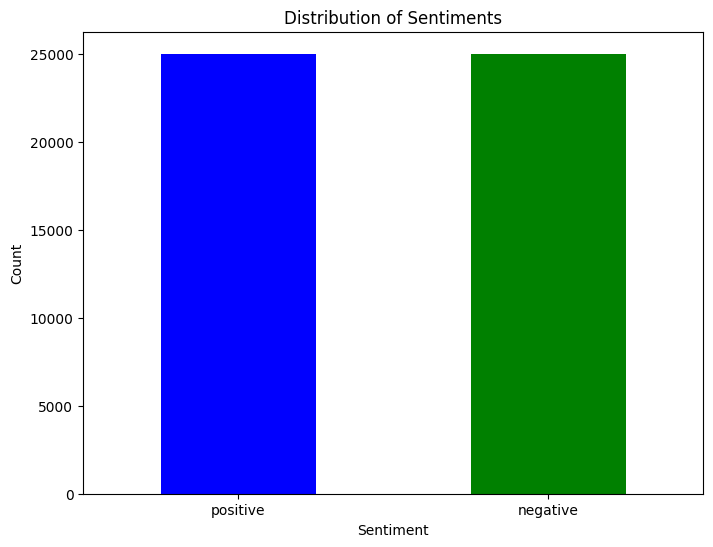

In [11]:
sentiment_counts = data['sentiment'].value_counts()
plt.figure(figsize=(8,6))
sentiment_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Visualize the frequent words

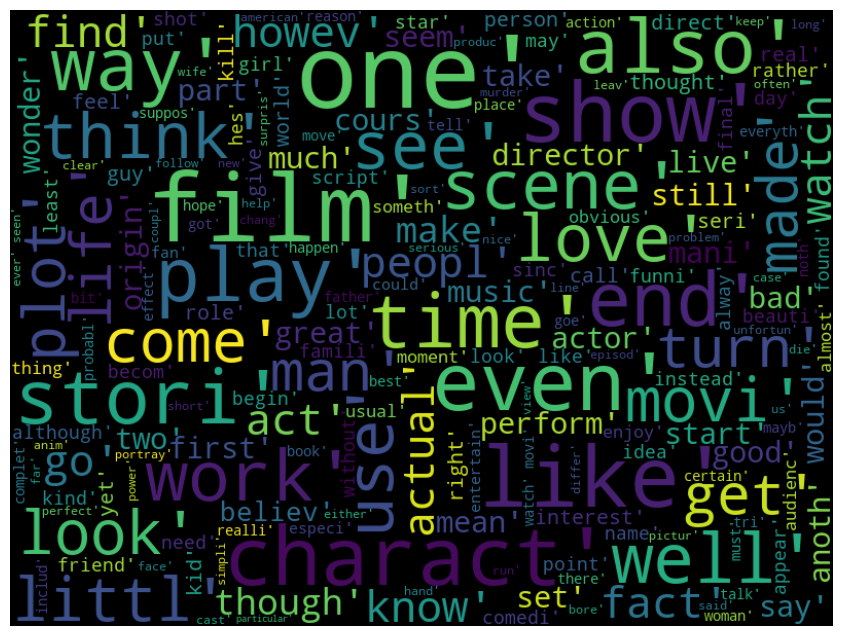

In [12]:
all_words = " ".join([sentence for sentence in data['review'].astype(str)])

wordcloud = WordCloud(width=800, height=599, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Visualize the positive words

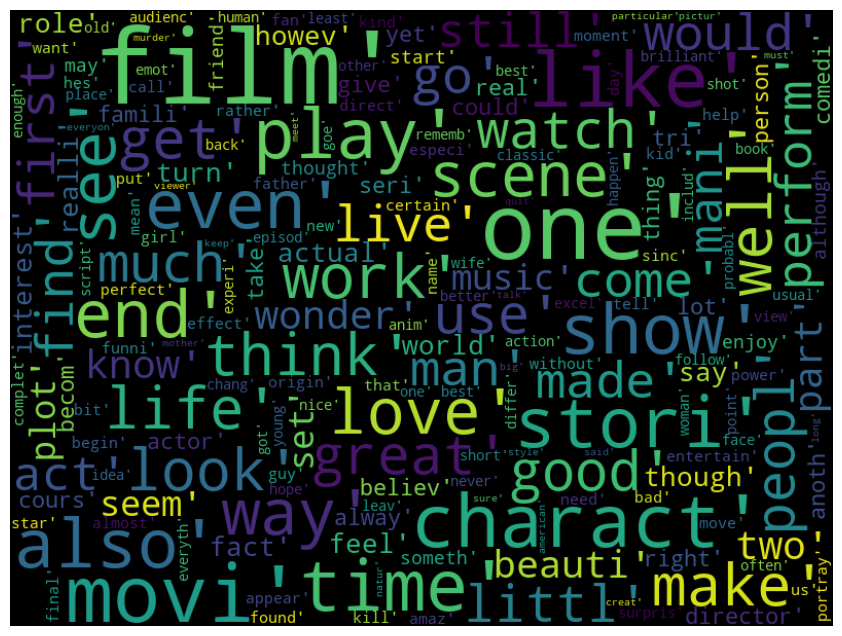

In [13]:
positive_words = " ".join([sentence for sentence in data['review'][data['sentiment'] == 'positive'].astype(str)])

wordcloud = WordCloud(width=800, height=599, random_state=42, max_font_size=100).generate(positive_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Visualize the negative words

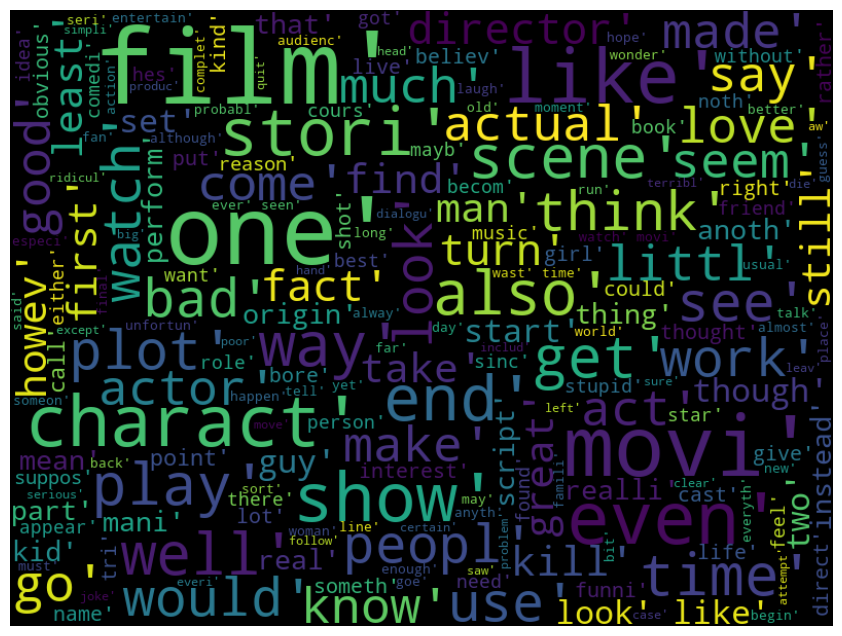

In [14]:
negative_words = " ".join([sentence for sentence in data['review'][data['sentiment'] == 'negative'].astype(str)])

wordcloud = WordCloud(width=800, height=599, random_state=42, max_font_size=100).generate(negative_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Text Vectorization

In [16]:
# Joining the token back into a string for vectorization
data['review'] = data['review'].apply(lambda x: ' '.join(x))

'phil alien one quirki film humour base around odd everyth rather actual punchlinesat first odd pretti funni movi progress didnt find joke odd funni anymoreit low budget film that never problem pretti interest charact eventu lost interesti imagin film would appeal stoner current partakingfor someth similar better tri brother anoth planet'

In [19]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

'phil alien one quirki film humour base around odd everyth rather actual punchlinesat first odd pretti funni movi progress didnt find joke odd funni anymoreit low budget film that never problem pretti interest charact eventu lost interesti imagin film would appeal stoner current partakingfor someth similar better tri brother anoth planet'

In [20]:
# Fit and transform the data
X = tfidf_vectorizer.fit_transform(data['review'])

# Extracting the target variable
y = data['sentiment']

'phil alien one quirki film humour base around odd everyth rather actual punchlinesat first odd pretti funni movi progress didnt find joke odd funni anymoreit low budget film that never problem pretti interest charact eventu lost interesti imagin film would appeal stoner current partakingfor someth similar better tri brother anoth planet'

# Splitting Data into Train and Test Sets:

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [32]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

Accuracy: 0.88
              precision    recall  f1-score   support

    negative       0.90      0.87      0.88      4961
    positive       0.87      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

